#### Dataset and DataLoader

In [18]:
import torch

import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

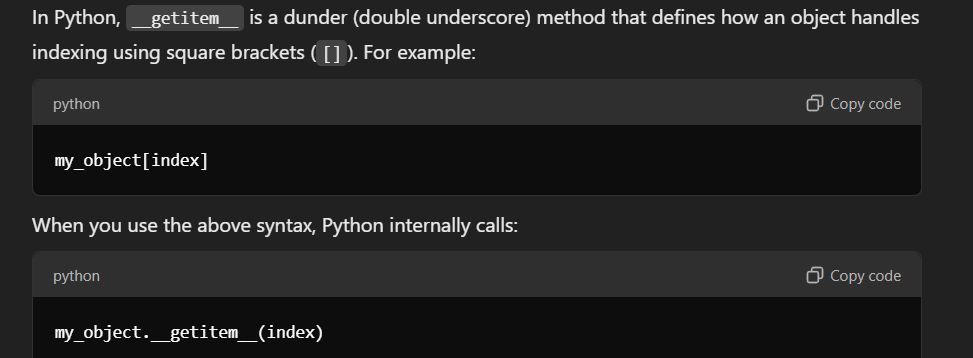

In [21]:
# Create a toy dataset
class NumberProductDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))
        print(self.numbers)

    def __getitem__(self, index):
        number1 = self.numbers[index]
        number2 = self.numbers[index] + 1
        return (number1, number2), number1 * number2

    def __len__(self):
        return len(self.numbers)

In [22]:
# Instantiate the dataset
dataset = NumberProductDataset(
    data_range=(0, 11)
)

# Access a data sample
data_sample = dataset[3]
print(data_sample)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
((3, 4), 12)


When a DataLoader is used to iterate over the dataset, it automatically calls __getitem__ for each index in the batch.

Internally, the DataLoader will call \___getitem\___ for each index up to batch_size and Collate the results into batches.

In [27]:
# Instantiate the dataset
dataset = NumberProductDataset(data_range=(0, 5))

# Create a DataLoader instance
dataloader = DataLoader(dataset, batch_size=3)

# Iterating over batches
for (num_pairs, products) in dataloader:
    print(num_pairs, products)

[0, 1, 2, 3, 4]
[tensor([0, 1, 2]), tensor([1, 2, 3])] tensor([0, 2, 6])
[tensor([3, 4]), tensor([4, 5])] tensor([12, 20])


In [29]:
## This dataset has two features—a pair of numbers—and a target value—the sum of those two numbers.

class NumberSumDataset(Dataset):
    def __init__(self, data_range=(1, 10)):
        self.numbers = list(range(data_range[0], data_range[1]))
        
    def __getitem__(self, index):
        number1 = float(self.numbers[index // len(self.numbers)])
        number2 = float(self.numbers[index % len(self.numbers)])                
        return torch.tensor([number1, number2]), torch.tensor([number1 + number2])

    def __len__(self):
        return len(self.numbers) ** 2

In [30]:
dataset = NumberSumDataset(data_range=(1, 100))

for i in range(10):
    print(dataset[i])

(tensor([1., 1.]), tensor([2.]))
(tensor([1., 2.]), tensor([3.]))
(tensor([1., 3.]), tensor([4.]))
(tensor([1., 4.]), tensor([5.]))
(tensor([1., 5.]), tensor([6.]))
(tensor([1., 6.]), tensor([7.]))
(tensor([1., 7.]), tensor([8.]))
(tensor([1., 8.]), tensor([9.]))
(tensor([1., 9.]), tensor([10.]))
(tensor([ 1., 10.]), tensor([11.]))


In [16]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 128)
        self.output_layer = nn.Linear(128, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        return self.output_layer(x)

In [27]:
dataset = NumberSumDataset(data_range=(0, 100))
dataloader = DataLoader(dataset, batch_size=100)
model = MLP(input_size=2)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
for epoch in range(10):
    total_loss = 0.0
    for number_pairs, sums in dataloader:  # Iterate over the batches
        predictions = model(number_pairs)  # Compute the model output
        loss = loss_function(predictions, sums)  # Compute the loss
        loss.backward()  # Perform backpropagation
        optimizer.step()  # Update the parameters
        optimizer.zero_grad()  # Zero the gradients

        total_loss += loss.item()  # Add the loss for all batches

    # Print the loss for each epoch
    print("Epoch {}: Sum of Batch Losses = {:.5f}".format(epoch, total_loss))

number1 : 0.0 number2 : 0.0 index : 0
number1 : 0.0 number2 : 1.0 index : 1
number1 : 0.0 number2 : 2.0 index : 2
number1 : 0.0 number2 : 3.0 index : 3
number1 : 0.0 number2 : 4.0 index : 4
number1 : 0.0 number2 : 5.0 index : 5
number1 : 0.0 number2 : 6.0 index : 6
number1 : 0.0 number2 : 7.0 index : 7
number1 : 0.0 number2 : 8.0 index : 8
number1 : 0.0 number2 : 9.0 index : 9
number1 : 0.0 number2 : 10.0 index : 10
number1 : 0.0 number2 : 11.0 index : 11
number1 : 0.0 number2 : 12.0 index : 12
number1 : 0.0 number2 : 13.0 index : 13
number1 : 0.0 number2 : 14.0 index : 14
number1 : 0.0 number2 : 15.0 index : 15
number1 : 0.0 number2 : 16.0 index : 16
number1 : 0.0 number2 : 17.0 index : 17
number1 : 0.0 number2 : 18.0 index : 18
number1 : 0.0 number2 : 19.0 index : 19
number1 : 0.0 number2 : 20.0 index : 20
number1 : 0.0 number2 : 21.0 index : 21
number1 : 0.0 number2 : 22.0 index : 22
number1 : 0.0 number2 : 23.0 index : 23
number1 : 0.0 number2 : 24.0 index : 24
number1 : 0.0 number

In [31]:
# Test the model on 23 + 73
model(torch.tensor([23.0, 73.0]))

tensor([96.0360], grad_fn=<ViewBackward0>)